<a href="https://colab.research.google.com/github/sakshisinha-13/Financial-Portfolio-Analysis/blob/main/Stock_Performance__and_Correlation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Set up the environment
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
np.random.seed(42)

In [17]:
# Fetch stock data
GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01")
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,15.569143,15.751460,14.861794,14.953949,14.936952,239835606
2012-05-21,14.956689,15.334772,14.943986,15.295419,15.278033,123477094
2012-05-22,15.278732,15.287947,14.844360,14.963912,14.946903,122533571
2012-05-23,14.985082,15.183090,14.872255,15.179603,15.162349,127600492
2012-05-24,15.172131,15.240873,14.915842,15.035145,15.018055,75935562


In [19]:
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,29.790001,29.809999,29.170000,29.270000,23.443844,56205300
2012-05-21,29.100000,29.790001,29.059999,29.750000,23.828306,38787900
2012-05-22,29.690001,29.879999,29.500000,29.760000,23.836306,39504900
2012-05-23,29.350000,29.400000,28.639999,29.110001,23.315681,65171000
2012-05-24,29.160000,29.299999,28.760000,29.070000,23.283648,52575000


In [20]:
# Combine the data and rename columns
dataset = pd.concat([GOOG['Close'], MSFT['Close']], axis=1)
dataset.columns = ['GOOG', 'MSFT']

In [21]:
# Calculate daily returns
dataset['R_GOOG'] = dataset['GOOG'].pct_change()
dataset['R_MSFT'] = dataset['MSFT'].pct_change()

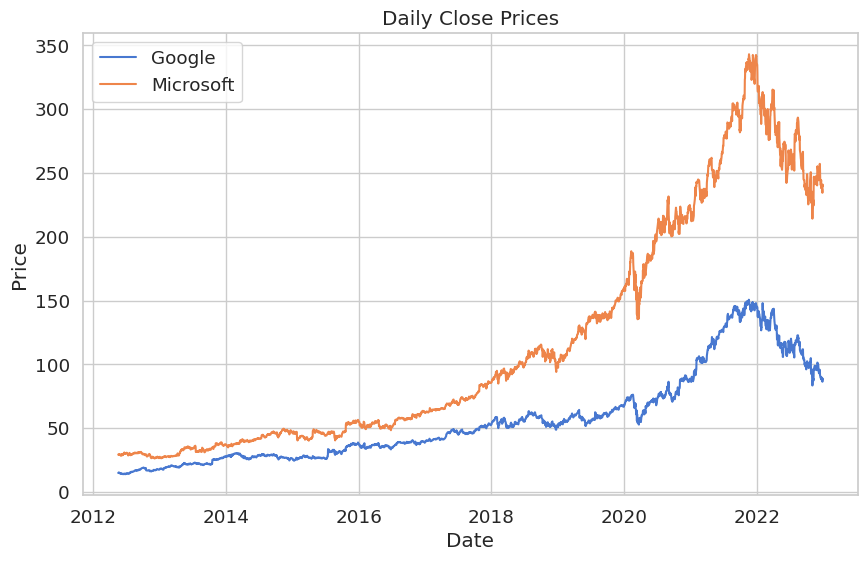

In [22]:
# Plot stock prices
plt.figure(figsize=(10,6))
plt.plot(dataset['GOOG'], label='Google')
plt.plot(dataset['MSFT'], label='Microsoft')
plt.title('Daily Close Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

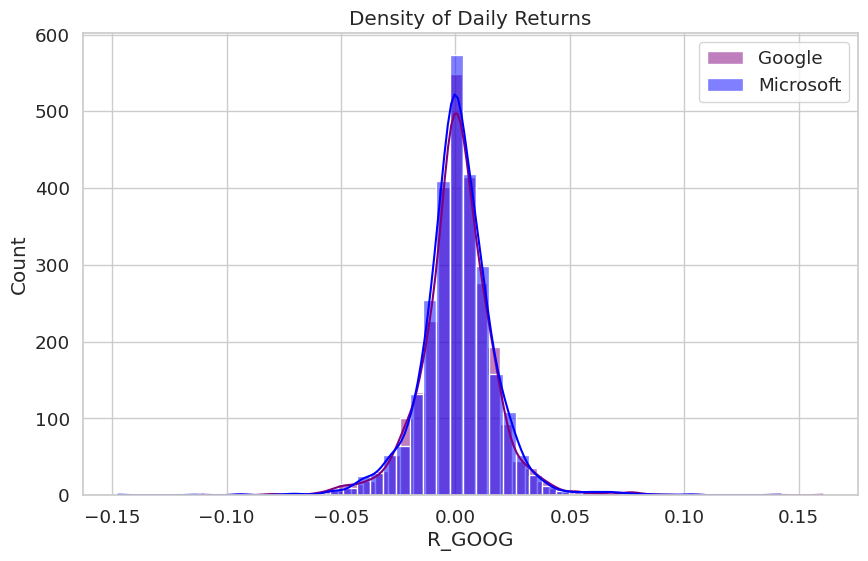

In [23]:
# Plot returns
plt.figure(figsize=(10,6))
sns.histplot(dataset['R_GOOG'].dropna(), kde=True, label='Google', color='purple', bins=50)
sns.histplot(dataset['R_MSFT'].dropna(), kde=True, label='Microsoft', color='blue', bins=50)
plt.title('Density of Daily Returns')
plt.legend()
plt.show()

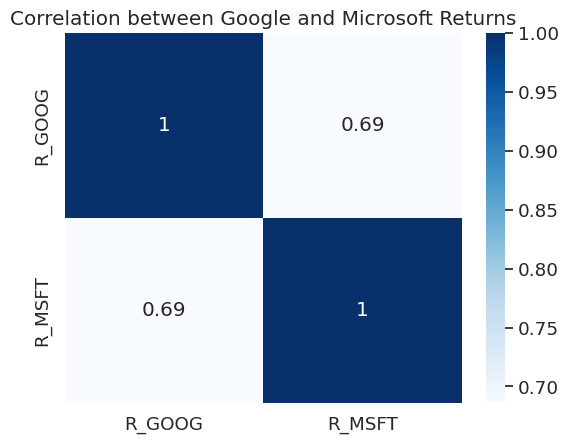

In [24]:
# Plot correlation heatmap with different color map
corr = dataset[['R_GOOG', 'R_MSFT']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation between Google and Microsoft Returns')
plt.show()


In [25]:
# Print basic statistics
print(dataset.describe())


              GOOG         MSFT       R_GOOG       R_MSFT
count  2673.000000  2673.000000  2672.000000  2672.000000
mean     56.827974   116.448706     0.000809     0.000930
std      35.578551    89.866126     0.016898     0.016856
min      13.924059    26.370001    -0.111008    -0.147390
25%      28.241163    44.830002    -0.006764    -0.006850
50%      47.955502    74.190002     0.000688     0.000681
75%      71.591003   183.429993     0.008903     0.009257
max     150.709000   343.109985     0.160524     0.142169
